# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import re
import joblib 
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading the Dataset

In [2]:
import pandas as pd
bangalore= pd.read_excel('C:/Guvi Projects/Car Dekho/Dataset/bangalore_cars.xlsx')
chennai = pd.read_excel("C:/Guvi Projects/Car Dekho/Dataset/chennai_cars.xlsx")
delhi = pd.read_excel("C:/Guvi Projects/Car Dekho/Dataset/delhi_cars.xlsx")
hyderabad = pd.read_excel("C:/Guvi Projects/Car Dekho/Dataset/hyderabad_cars.xlsx")
jaipur = pd.read_excel("C:/Guvi Projects/Car Dekho/Dataset/jaipur_cars.xlsx")
kolkata = pd.read_excel("C:/Guvi Projects/Car Dekho/Dataset/kolkata_cars.xlsx")

In [4]:
# Add city column
bangalore["City"] = "Bangalore"
chennai["City"] = "Chennai"
delhi["City"] = "Delhi"
hyderabad["City"] = "Hyderabad"
jaipur["City"] = "Jaipur"
kolkata["City"] = "Kolkata"

# Concatenate data
car_dekho = pd.concat([bangalore, chennai, delhi, hyderabad, jaipur, kolkata], axis=0, ignore_index=True)

In [5]:
car_dekho

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata


In [6]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    8369 non-null   object
 1   new_car_overview  8369 non-null   object
 2   new_car_feature   8369 non-null   object
 3   new_car_specs     8369 non-null   object
 4   car_links         8369 non-null   object
 5   City              8369 non-null   object
dtypes: object(6)
memory usage: 392.4+ KB


# 1 Data Processing


# Converting Unstructure Data to Structured Data

In [7]:
car_dekho["new_car_detail"].values

array(["{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}",
       "{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '32,706', 'transmission': 'Manual', 'ownerNo': 2, 'owner': '2nd Owner', 'oem': 'Ford', 'model': 'Ford Ecosport', 'modelYear': 2018, 'centralVariantId': 6087, 'variantName': '1.5 Petrol Titanium BSIV', 'price': '₹ 8.11 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 d

In [8]:
# by iterating through each row in new_car_detail feature, and using json.loads to load the dictionary type values and appending their values to their respective keys.
import json

data_car_detail = {'it': [], 'fuel_type': [], 'Body_Type': [], 'Kilometers_driven': [], 'transmission': [], 'ownerNo': [], 'owner': [], 'oem': [], 'model': [], 'modelYear': [], 'centralVariantId': [], 
                   'variantName': [], 'price': []}

for i in car_dekho["new_car_detail"]:
    a = json.loads(i.replace("'",'"' ).replace("None","0"))
    data_car_detail["fuel_type"].append(a["ft"])
    data_car_detail["it"].append(a["it"])
    data_car_detail["Body_Type"].append(a["bt"])
    data_car_detail["Kilometers_driven"].append(a["km"])
    data_car_detail["transmission"].append(a["transmission"])
    data_car_detail["ownerNo"].append(a["ownerNo"])
    data_car_detail["owner"].append(a["owner"])
    data_car_detail["oem"].append(a["oem"])
    data_car_detail["model"].append(a["model"])
    data_car_detail["modelYear"].append(a["modelYear"])
    data_car_detail["centralVariantId"].append(a["centralVariantId"])
    data_car_detail["variantName"].append(a["variantName"])
    data_car_detail["price"].append(a["price"])

In [9]:
# converting it in to dataframe
df_car_detail = pd.DataFrame(data_car_detail)
df_car_detail

,it,fuel_type,Body_Type,Kilometers_driven,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh


In [10]:
car_dekho["new_car_overview"].values

array(["{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmiss

In [11]:
# getting unique keys in new_car_overview feature
key = []
for i in car_dekho["new_car_overview"]:
    b = json.loads(i.replace("'", '"').replace("None", "0"))
    for j in b["top"]:
            key.append(j["key"])

set(key)

{'Engine Displacement',
 'Fuel Type',
 'Insurance Validity',
 'Kms Driven',
 'Ownership',
 'RTO',
 'Registration Year',
 'Seats',
 'Transmission',
 'Year of Manufacture'}

In [12]:
import numpy as np
data_car_overview = {'Engine Displacement': [], 'Fuel Type': [], 'Insurance Validity': [], 'Kms Driven': [], 'Ownership': [], 'RTO': [], 'Registration Year': [],
                     'Seats': [], 'Transmission': [], 'Year of Manufacture': []}

for i in car_dekho["new_car_overview"]:
    b = json.loads(i.replace("'", '"').replace("None", "0"))
    col = ['Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven', 'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission', 'Year of Manufacture']
    for j in b["top"]:
        data_car_overview[j["key"]].append(j["value"])
        col.remove(j["key"])
    for k in col:
        data_car_overview[k].append(np.nan)           

In [13]:
df_car_overview = pd.DataFrame(data_car_overview)
df_car_overview

,Engine Displacement,Fuel Type,Insurance Validity,Kms Driven,Ownership,RTO,Registration Year,Seats,Transmission,Year of Manufacture
0,998 cc,Petrol,Third Party insurance,"1,20,000 Kms",Third Owner,KA51,2015,5 Seats,Manual,2015.0
1,1497 cc,Petrol,Comprehensive,"32,706 Kms",Second Owner,KA05,Feb 2018,5 Seats,Manual,2018.0
2,1199 cc,Petrol,Comprehensive,"11,949 Kms",First Owner,KA03,Sept 2018,5 Seats,Manual,2018.0
3,1197 cc,Petrol,Comprehensive,"17,794 Kms",First Owner,KA53,Dec 2014,5 Seats,Manual,2014.0
4,1248 cc,Diesel,Third Party insurance,"60,000 Kms",First Owner,KA04,2015,5 Seats,Manual,2015.0
...,...,...,...,...,...,...,...,...,...,...
8364,998 cc,Petrol,Third Party insurance,"10,000 Kms",First Owner,NaN,2022,5 Seats,Manual,2022.0
8365,796 cc,Petrol,Third Party insurance,"1,20,000 Kms",First Owner,NaN,2014,5 Seats,Manual,2014.0
8366,1796 cc,Petrol,Third Party insurance,"50,000 Kms",Third Owner,WB06,2011,5 Seats,Automatic,2011.0
8367,1197 cc,Petrol,Third Party insurance,"40,000 Kms",First Owner,NaN,2012,5 Seats,Manual,2012.0


In [14]:
car_dekho["new_car_specs"].values

array(["{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'valu

In [15]:
key = []
for i in car_dekho["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    for j in c["top"]:
        key.append(j["key"])

set(key)

{'Engine', 'Max Power', 'Mileage', 'Seats', 'Torque', 'Wheel Size'}

In [16]:
data_car_specs_1 = {'Wheel Size': [], 'Seats': [], 'Mileage': [], 'Torque': [], 'Engine': [], 'Max Power': []}

for i in car_dekho["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    col = ['Wheel Size', 'Seats', 'Mileage', 'Torque', 'Engine', 'Max Power']
    for j in c["top"]:
        data_car_specs_1[j["key"]].append(j["value"])
        col.remove(j["key"])
    for k in col:
        data_car_specs_1[k].append(np.nan)

In [17]:
df_car_specs_1 = pd.DataFrame(data_car_specs_1)
df_car_specs_1

,Wheel Size,Seats,Mileage,Torque,Engine,Max Power
0,NaN,5,23.1 kmpl,90Nm,998 CC,67.04bhp
1,16,5,17 kmpl,150Nm,1497 CC,121.31bhp
2,14,5,23.84 kmpl,114Nm,1199 CC,84bhp
3,14,5,19.1 kmpl,113.75Nm,1197 CC,81.86bhp
4,16,5,23.65 kmpl,200Nm,1248 CC,88.5bhp
...,...,...,...,...,...,...
8364,NaN,5,25.24 kmpl,89Nm,998 CC,65.71bhp
8365,NaN,5,22.74 kmpl,69Nm,796 CC,47.3bhp
8366,17,5,11.74 kmpl,285Nm,1796 CC,186bhp
8367,14,5,18.5 kmpl,114Nm,1197 CC,85.80bhp


In [18]:
key = []
for i in car_dekho["new_car_specs"]:
    # print(i)
    c = json.loads(i.replace("'", '"'))
    for j in c["data"][0]["list"]:
        key.append(j["key"])
        
set(key)

{'Alloy Wheel Size',
 'BoreX Stroke',
 'Color',
 'Compression Ratio',
 'Displacement',
 'Engine Type',
 'Fuel Suppy System',
 'Max Power',
 'Max Torque',
 'No Door Numbers',
 'No of Cylinder',
 'Seating Capacity',
 'Steering Type',
 'Super Charger',
 'Turbo Charger',
 'Tyre Type',
 'Value Configuration',
 'Values per Cylinder'}

In [19]:
data_car_specs_2 = {'Turbo Charger': [], 'No of Cylinder': [], 'Tyre Type': [], 'Displacement': [], 'BoreX Stroke': [], 'Steering Type': [], 'Color': [], 'No Door Numbers': [],
                   'Alloy Wheel Size': [], 'Compression Ratio': [], 'Fuel Suppy System': [], 'Super Charger': [], 'Seating Capacity': [], 'Values per Cylinder': [], 
                   'Max Torque': [], 'Value Configuration': [], 'Engine Type' : [], 'Max Power': []}

for i in car_dekho["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    col = ['Turbo Charger', 'No of Cylinder', 'Tyre Type', 'Displacement', 'BoreX Stroke', 'Steering Type', 'Color', 'No Door Numbers', 'Alloy Wheel Size', 'Compression Ratio', 
           'Fuel Suppy System', 'Super Charger', 'Seating Capacity', 'Values per Cylinder', 'Max Torque', 'Value Configuration', 'Engine Type', 'Max Power']
    
    for j in c["data"][0]["list"]:
        data_car_specs_2[j["key"]].append(j["value"])
        col.remove(j["key"])
        
    for k in col:
        data_car_specs_2[k].append(np.nan)

In [20]:
df_car_specs_2 = pd.DataFrame(data_car_specs_2)
df_car_specs_2

,Turbo Charger,No of Cylinder,Tyre Type,Displacement,BoreX Stroke,Steering Type,Color,No Door Numbers,Alloy Wheel Size,Compression Ratio,Fuel Suppy System,Super Charger,Seating Capacity,Values per Cylinder,Max Torque,Value Configuration,Engine Type,Max Power
0,No,3.0,NaN,998,73 X 82 mm,NaN,White,NaN,NaN,11.0:1,MPFi,No,NaN,4.0,90Nm@3500rpm,DOHC,K10B Engine,67.04bhp@6000rpm
1,No,3.0,NaN,1497,79 X 76.5 mm,NaN,White,NaN,NaN,11.0:1,Direct Injection,No,NaN,4.0,150Nm@4500rpm,DOHC,Ti-VCT Petrol Engine,121.31bhp@6500rpm
2,No,3.0,NaN,1199,77 X 85.8 mm,NaN,Red,NaN,NaN,10.8:1,MPFi,No,NaN,4.0,114Nm@3500rpm,DOHC,Revotron Engine,84bhp@6000rpm
3,No,4.0,NaN,1197,NaN,NaN,Others,NaN,NaN,NaN,Direct Injection,No,NaN,4.0,113.75Nm@4000rpm,DOHC,Kappa VTVT Petrol Engine,81.86bhp@6000rpm
4,Yes,4.0,NaN,1248,69.6 x 82 mm,NaN,Gray,NaN,NaN,NaN,NaN,No,NaN,4.0,200Nm@1750rpm,DOHC,DDiS 200 Diesel Engine,88.5bhp@4000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,NaN,3.0,NaN,998,NaN,NaN,Others,NaN,NaN,NaN,NaN,NaN,NaN,4.0,89Nm@3500rpm,NaN,K10C,65.71bhp@5500rpm
8365,No,3.0,NaN,796,NaN,NaN,Others,NaN,NaN,NaN,MPFi,No,NaN,4.0,69Nm@3500rpm,DOHC,F8D Petrol Engine,47.3bhp@6000rpm
8366,No,4.0,NaN,1796,NaN,NaN,Others,NaN,NaN,9.3:1,Mpfi,No,NaN,4.0,285Nm@2400-4000rpm,NaN,Blue Efficiency Engine,186bhp@5600rpm
8367,No,4.0,NaN,1197,NaN,NaN,Others,NaN,NaN,NaN,MPFI,No,NaN,4.0,114Nm@4000rpm,DOHC,K Series Petrol Engine,85.80bhp@6000rpm


In [21]:
# concatenating all the dataframe in to a single one
total_df = pd.concat([car_dekho["City"], df_car_detail, df_car_overview, df_car_specs_1, df_car_specs_2], axis = 1)
total_df

,City,it,fuel_type,Body_Type,Kilometers_driven,transmission,ownerNo,owner,oem,model,...,Alloy Wheel Size,Compression Ratio,Fuel Suppy System,Super Charger,Seating Capacity,Values per Cylinder,Max Torque,Value Configuration,Engine Type,Max Power
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,NaN,11.0:1,MPFi,No,NaN,4.0,90Nm@3500rpm,DOHC,K10B Engine,67.04bhp@6000rpm
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,NaN,11.0:1,Direct Injection,No,NaN,4.0,150Nm@4500rpm,DOHC,Ti-VCT Petrol Engine,121.31bhp@6500rpm
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,NaN,10.8:1,MPFi,No,NaN,4.0,114Nm@3500rpm,DOHC,Revotron Engine,84bhp@6000rpm
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,NaN,NaN,Direct Injection,No,NaN,4.0,113.75Nm@4000rpm,DOHC,Kappa VTVT Petrol Engine,81.86bhp@6000rpm
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,NaN,NaN,NaN,No,NaN,4.0,200Nm@1750rpm,DOHC,DDiS 200 Diesel Engine,88.5bhp@4000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,NaN,NaN,NaN,NaN,NaN,4.0,89Nm@3500rpm,NaN,K10C,65.71bhp@5500rpm
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,NaN,NaN,MPFi,No,NaN,4.0,69Nm@3500rpm,DOHC,F8D Petrol Engine,47.3bhp@6000rpm
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,NaN,9.3:1,Mpfi,No,NaN,4.0,285Nm@2400-4000rpm,NaN,Blue Efficiency Engine,186bhp@5600rpm
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,NaN,NaN,MPFI,No,NaN,4.0,114Nm@4000rpm,DOHC,K Series Petrol Engine,85.80bhp@6000rpm


In [22]:
total_df.shape

(8369, 48)

In [23]:
# features/columns
total_df.columns

Index(['City', 'it', 'fuel_type', 'Body_Type', 'Kilometers_driven',
       'transmission', 'ownerNo', 'owner', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'Engine Displacement',
       'Fuel Type', 'Insurance Validity', 'Kms Driven', 'Ownership', 'RTO',
       'Registration Year', 'Seats', 'Transmission', 'Year of Manufacture',
       'Wheel Size', 'Seats', 'Mileage', 'Torque', 'Engine', 'Max Power',
       'Turbo Charger', 'No of Cylinder', 'Tyre Type', 'Displacement',
       'BoreX Stroke', 'Steering Type', 'Color', 'No Door Numbers',
       'Alloy Wheel Size', 'Compression Ratio', 'Fuel Suppy System',
       'Super Charger', 'Seating Capacity', 'Values per Cylinder',
       'Max Torque', 'Value Configuration', 'Engine Type', 'Max Power'],
      dtype='object')

# Handling Missing Values

In [24]:
# calculating missing values percentage to drop the columns that contains higher percentage of missing values 
total_df.isnull().sum()/total_df.shape[0]*100

City                    0.000000
it                      0.000000
fuel_type               0.000000
Body_Type               0.000000
Kilometers_driven       0.000000
transmission            0.000000
ownerNo                 0.000000
owner                   0.000000
oem                     0.000000
model                   0.000000
modelYear               0.000000
centralVariantId        0.000000
variantName             0.000000
price                   0.000000
Engine Displacement     0.047795
Fuel Type               0.000000
Insurance Validity      0.047795
Kms Driven              0.023898
Ownership               0.382363
RTO                    10.610587
Registration Year       0.621341
Seats                   0.071693
Transmission            0.000000
Year of Manufacture     0.238977
Wheel Size             35.643446
Seats                   0.059744
Mileage                 3.429322
Torque                  0.716932
Engine                  0.047795
Max Power               0.716932
Turbo Char

In [25]:
# we are retaining those columns which has less than five percentage of missing values
new_df = total_df.loc[:, total_df.isnull().sum()/total_df.shape[0]*100 < 5] 
# top 20 columns
new_df.iloc[:, 0:20]

,City,it,fuel_type,Body_Type,Kilometers_driven,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,Engine Displacement,Fuel Type,Insurance Validity,Kms Driven,Ownership,Registration Year
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,998 cc,Petrol,Third Party insurance,"1,20,000 Kms",Third Owner,2015
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,1497 cc,Petrol,Comprehensive,"32,706 Kms",Second Owner,Feb 2018
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,1199 cc,Petrol,Comprehensive,"11,949 Kms",First Owner,Sept 2018
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,1197 cc,Petrol,Comprehensive,"17,794 Kms",First Owner,Dec 2014
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,1248 cc,Diesel,Third Party insurance,"60,000 Kms",First Owner,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,998 cc,Petrol,Third Party insurance,"10,000 Kms",First Owner,2022
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,796 cc,Petrol,Third Party insurance,"1,20,000 Kms",First Owner,2014
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,1796 cc,Petrol,Third Party insurance,"50,000 Kms",Third Owner,2011
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,1197 cc,Petrol,Third Party insurance,"40,000 Kms",First Owner,2012


In [26]:
# last columns
new_df.iloc[:, 20:37]

,Seats,Transmission,Year of Manufacture,Seats,Mileage,Torque,Engine,Max Power,No of Cylinder,Displacement,Color,Values per Cylinder,Max Torque,Engine Type,Max Power
0,5 Seats,Manual,2015.0,5,23.1 kmpl,90Nm,998 CC,67.04bhp,3.0,998,White,4.0,90Nm@3500rpm,K10B Engine,67.04bhp@6000rpm
1,5 Seats,Manual,2018.0,5,17 kmpl,150Nm,1497 CC,121.31bhp,3.0,1497,White,4.0,150Nm@4500rpm,Ti-VCT Petrol Engine,121.31bhp@6500rpm
2,5 Seats,Manual,2018.0,5,23.84 kmpl,114Nm,1199 CC,84bhp,3.0,1199,Red,4.0,114Nm@3500rpm,Revotron Engine,84bhp@6000rpm
3,5 Seats,Manual,2014.0,5,19.1 kmpl,113.75Nm,1197 CC,81.86bhp,4.0,1197,Others,4.0,113.75Nm@4000rpm,Kappa VTVT Petrol Engine,81.86bhp@6000rpm
4,5 Seats,Manual,2015.0,5,23.65 kmpl,200Nm,1248 CC,88.5bhp,4.0,1248,Gray,4.0,200Nm@1750rpm,DDiS 200 Diesel Engine,88.5bhp@4000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,5 Seats,Manual,2022.0,5,25.24 kmpl,89Nm,998 CC,65.71bhp,3.0,998,Others,4.0,89Nm@3500rpm,K10C,65.71bhp@5500rpm
8365,5 Seats,Manual,2014.0,5,22.74 kmpl,69Nm,796 CC,47.3bhp,3.0,796,Others,4.0,69Nm@3500rpm,F8D Petrol Engine,47.3bhp@6000rpm
8366,5 Seats,Automatic,2011.0,5,11.74 kmpl,285Nm,1796 CC,186bhp,4.0,1796,Others,4.0,285Nm@2400-4000rpm,Blue Efficiency Engine,186bhp@5600rpm
8367,5 Seats,Manual,2012.0,5,18.5 kmpl,114Nm,1197 CC,85.80bhp,4.0,1197,Others,4.0,114Nm@4000rpm,K Series Petrol Engine,85.80bhp@6000rpm


In [27]:
# features that are selected
new_df = new_df[["City", "Fuel Type", "Body_Type", "Kilometers_driven", "Transmission", "ownerNo", "oem", "model", "modelYear", "Displacement", "variantName", "Insurance Validity", "Seats", 
                 "Mileage", "No of Cylinder", "Color", "Values per Cylinder", "Engine Type", "Torque", "Max Power", "price" ]]

In [28]:
new_df.shape

(8369, 23)

In [29]:
new_df.nunique()

City                      6
Fuel Type                 5
Body_Type                11
Kilometers_driven      4090
Transmission              2
ownerNo                   6
oem                      33
model                   315
modelYear                29
Displacement            150
variantName            2157
Insurance Validity        7
Seats                     8
Seats                     9
Mileage                 522
No of Cylinder            8
Color                   153
Values per Cylinder       5
Engine Type             508
Torque                  366
Max Power               530
Max Power               760
price                  1400
dtype: int64

In [30]:
new_df.columns

Index(['City', 'Fuel Type', 'Body_Type', 'Kilometers_driven', 'Transmission',
       'ownerNo', 'oem', 'model', 'modelYear', 'Displacement', 'variantName',
       'Insurance Validity', 'Seats', 'Seats', 'Mileage', 'No of Cylinder',
       'Color', 'Values per Cylinder', 'Engine Type', 'Torque', 'Max Power',
       'Max Power', 'price'],
      dtype='object')

In [31]:
seats = new_df["Seats"].iloc[:, 1:2]
seats

,Seats
0,5
1,5
2,5
3,5
4,5
...,...
8364,5
8365,5
8366,5
8367,5


In [32]:
power = new_df["Max Power"].iloc[:, 0:1]
power

,Max Power
0,67.04bhp
1,121.31bhp
2,84bhp
3,81.86bhp
4,88.5bhp
...,...
8364,65.71bhp
8365,47.3bhp
8366,186bhp
8367,85.80bhp


In [33]:
new_df = new_df.drop(columns = ["Seats", "Max Power"], axis = 1)

In [34]:
new_df["Seats"] = seats
new_df["Power"] = power

In [35]:
# after doing the above steps
new_df.columns

Index(['City', 'Fuel Type', 'Body_Type', 'Kilometers_driven', 'Transmission',
       'ownerNo', 'oem', 'model', 'modelYear', 'Displacement', 'variantName',
       'Insurance Validity', 'Mileage', 'No of Cylinder', 'Color',
       'Values per Cylinder', 'Engine Type', 'Torque', 'price', 'Seats',
       'Power'],
      dtype='object')

In [36]:
new_df.isna().sum()

City                     0
Fuel Type                0
Body_Type                0
Kilometers_driven        0
Transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
Displacement             4
variantName              0
Insurance Validity       4
Mileage                287
No of Cylinder          31
Color                    3
Values per Cylinder     51
Engine Type            295
Torque                  60
price                    0
Seats                    5
Power                   60
dtype: int64

In [37]:
# dropping those rows
new_df.dropna(inplace = True)

In [38]:
# after removing missing values
new_df.isna().sum()

City                   0
Fuel Type              0
Body_Type              0
Kilometers_driven      0
Transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
Displacement           0
variantName            0
Insurance Validity     0
Mileage                0
No of Cylinder         0
Color                  0
Values per Cylinder    0
Engine Type            0
Torque                 0
price                  0
Seats                  0
Power                  0
dtype: int64

In [39]:
new_df.duplicated().sum()

95

In [40]:
# dropping the duplicated rows
new_df.drop_duplicates(inplace = True)

In [41]:
# after removing duplicates
new_df.duplicated().sum()

0

In [42]:
# resetting index
new_df.reset_index(drop = True, inplace = True)

In [43]:
# shape of the dataset
new_df.shape

(7716, 21)

In [44]:
new_df.nunique()

City                      6
Fuel Type                 5
Body_Type                11
Kilometers_driven      3869
Transmission              2
ownerNo                   6
oem                      31
model                   275
modelYear                26
Displacement            134
variantName            1951
Insurance Validity        7
Mileage                 508
No of Cylinder            8
Color                   146
Values per Cylinder       5
Engine Type             464
Torque                  342
price                  1324
Seats                     8
Power                   490
dtype: int64

In [45]:
for i in new_df.columns:
    print("feature-->", i, "\n", new_df[i].unique())

feature--> City 
 ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Jaipur' 'Kolkata']
feature--> Fuel Type 
 ['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']
feature--> Body_Type 
 ['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Convertibles'
 'Hybrids' 'Wagon' 'Pickup Trucks' '']
feature--> Kilometers_driven 
 ['1,20,000' '32,706' '11,949' ... '53,562' '32,190' '1,51,000']
feature--> Transmission 
 ['Manual' 'Automatic']
feature--> ownerNo 
 [3 2 1 4 5 0]
feature--> oem 
 ['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra' 'BMW'
 'Renault' 'Mercedes-Benz' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Porsche']
feature--> model 
 ['Maruti Celerio' 'Ford Ecosport' 'Tata Tiago' 'Hyundai Xcent'
 'Maruti SX4 S Cross' 'Jeep Compass' 'Datsun GO' 'Maruti Ciaz'
 'Maruti Baleno' 'Hyundai Grand i10' 'Honda Jazz' 'Mahindra XUV500'
 'Hyund

# Standardising Data Formats

In [46]:
# replacing ,(comma) in km feature with no space betwwen the numbers
new_df["Kilometers_driven"] = new_df["Kilometers_driven"].apply(lambda x: x.replace(",", ""))

In [47]:
# getting numerical value for mileage
new_df["Mileage_num"] = new_df["Mileage"].apply(lambda x: x.split(" ")[0])

In [48]:
# converting all the values to same case using string method [ title() ]
new_df["Color"] = new_df["Color"].apply(lambda x: x.title())

In [49]:
# gettin the numerical value for torque
new_df["Torque_num"] = new_df["Torque"].apply(lambda x: x.lower().split("nm")[0].split(" ")[0])

In [50]:
# getting the numerical value for price feature
price = new_df["price"].apply(lambda x: x.split(" ")[1]).to_list()
price = [int(i.replace(",", ""))/100000 if "," in i else float(i) for i in price]
new_df['price'] = pd.to_numeric(new_df['price'], errors='coerce')* 1e5 # Multiply by 1e5 for Lakh
price
new_df["price_num"] = price

In [51]:
# getting the numerical value for power feature
new_df["Power_num"] = new_df["Power"].apply(lambda x: x.split("b")[0].lower().split("p")[0])

In [52]:
new_df.drop(columns = ["Mileage", "Torque", "price", "Power"], axis = 1, inplace = True)

In [53]:
new_df

,City,Fuel Type,Body_Type,Kilometers_driven,Transmission,ownerNo,oem,model,modelYear,Displacement,...,Insurance Validity,No of Cylinder,Color,Values per Cylinder,Engine Type,Seats,Mileage_num,Torque_num,price_num,Power_num
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,998,...,Third Party insurance,3.0,White,4.0,K10B Engine,5,23.1,90,4.00,67.04
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1497,...,Comprehensive,3.0,White,4.0,Ti-VCT Petrol Engine,5,17,150,8.11,121.31
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1199,...,Comprehensive,3.0,Red,4.0,Revotron Engine,5,23.84,114,5.85,84
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1197,...,Comprehensive,4.0,Others,4.0,Kappa VTVT Petrol Engine,5,19.1,113.75,4.62,81.86
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,1248,...,Third Party insurance,4.0,Gray,4.0,DDiS 200 Diesel Engine,5,23.65,200,7.90,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,998,...,Third Party insurance,3.0,Others,4.0,K10C,5,25.24,89,5.10,65.71
7712,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,796,...,Third Party insurance,3.0,Others,4.0,F8D Petrol Engine,5,22.74,69,1.80,47.3
7713,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,1796,...,Third Party insurance,4.0,Others,4.0,Blue Efficiency Engine,5,11.74,285,5.50,186
7714,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,1197,...,Third Party insurance,4.0,Others,4.0,K Series Petrol Engine,5,18.5,114,1.40,85.80


In [54]:
new_df.shape

(7716, 21)

In [55]:
new_df.dtypes

City                    object
Fuel Type               object
Body_Type               object
Kilometers_driven       object
Transmission            object
ownerNo                  int64
oem                     object
model                   object
modelYear                int64
Displacement            object
variantName             object
Insurance Validity      object
No of Cylinder         float64
Color                   object
Values per Cylinder    float64
Engine Type             object
Seats                   object
Mileage_num             object
Torque_num              object
price_num              float64
Power_num               object
dtype: object

In [56]:
# getting the row value which has given the error when converting in to float format
val = []
for i in new_df["Torque_num"].to_list():
    try:
        float(i)
    except:
        val.append(i)
val

['210/1750-4600']

In [57]:
# so ,the above value has given the error. so. we will drop the  corresponding row which has this value
ind = new_df[new_df["Torque_num"] == '210/1750-4600'].index
new_df.drop(index = ind, axis = 0, inplace = True)

In [58]:
# the same steps for power_num feature
val = []
for i in new_df["Power_num"].to_list():
    try:
        float(i)
    except:
        val.append(i)
val

['145h',
 '78 kw ',
 '63 h',
 '160 bh',
 '66(90) / 4000',
 '90(66) ',
 '70.40bh',
 '90(66) ',
 '70.40bh',
 '90(66) ',
 '66(90) / 4000',
 '66(90) / 4000',
 '90(66) ',
 '63 h',
 '63 h',
 '63 h',
 '63 h',
 '90(66) ']

In [59]:
# so, we will try to get the numerical value using regular expression and will replace it the original dataframe.
import re
for i in val:
    new_df.loc[new_df["Power_num"] == i, "Power_num"] = re.findall(r"^\d+", i)[0]

In [60]:
# data type conversion
new_df["Kilometers_driven"] = new_df["Kilometers_driven"].astype(int)
new_df["Displacement"] = new_df["Displacement"].astype(int) 
new_df["Seats"] = new_df["Seats"].astype(int) 
new_df["Mileage_num"] = new_df["Mileage_num"].astype(float) 
new_df["Torque_num"] = new_df["Torque_num"].astype(float)  
new_df["Power_num"] = new_df["Power_num"].astype(float)

In [61]:
for i in new_df.columns:
    print(i, "--->", new_df[new_df[i] == ""].shape)

City ---> (0, 21)
Fuel Type ---> (0, 21)
Body_Type ---> (3, 21)
Kilometers_driven ---> (0, 21)
Transmission ---> (0, 21)
ownerNo ---> (0, 21)
oem ---> (0, 21)
model ---> (0, 21)
modelYear ---> (0, 21)
Displacement ---> (0, 21)
variantName ---> (0, 21)
Insurance Validity ---> (0, 21)
No of Cylinder ---> (0, 21)
Color ---> (0, 21)
Values per Cylinder ---> (0, 21)
Engine Type ---> (0, 21)
Seats ---> (0, 21)
Mileage_num ---> (0, 21)
Torque_num ---> (0, 21)
price_num ---> (0, 21)
Power_num ---> (0, 21)


In [62]:
new_df.to_csv('C:\\Guvi Projects\\Car Dekho\\Dataset\\CleanedCSV\\car_dekho_cleaned_dataset.csv', index=False)
new_df

,City,Fuel Type,Body_Type,Kilometers_driven,Transmission,ownerNo,oem,model,modelYear,Displacement,...,Insurance Validity,No of Cylinder,Color,Values per Cylinder,Engine Type,Seats,Mileage_num,Torque_num,price_num,Power_num
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,998,...,Third Party insurance,3.0,White,4.0,K10B Engine,5,23.10,90.00,4.00,67.04
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1497,...,Comprehensive,3.0,White,4.0,Ti-VCT Petrol Engine,5,17.00,150.00,8.11,121.31
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1199,...,Comprehensive,3.0,Red,4.0,Revotron Engine,5,23.84,114.00,5.85,84.00
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1197,...,Comprehensive,4.0,Others,4.0,Kappa VTVT Petrol Engine,5,19.10,113.75,4.62,81.86
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,1248,...,Third Party insurance,4.0,Gray,4.0,DDiS 200 Diesel Engine,5,23.65,200.00,7.90,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,998,...,Third Party insurance,3.0,Others,4.0,K10C,5,25.24,89.00,5.10,65.71
7712,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,796,...,Third Party insurance,3.0,Others,4.0,F8D Petrol Engine,5,22.74,69.00,1.80,47.30
7713,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,1796,...,Third Party insurance,4.0,Others,4.0,Blue Efficiency Engine,5,11.74,285.00,5.50,186.00
7714,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,1197,...,Third Party insurance,4.0,Others,4.0,K Series Petrol Engine,5,18.50,114.00,1.40,85.80


#  Encoding Categorical Variables

In [63]:
# 'so the bt feature has 3 empty strings. so, we will drop it
ind = new_df[new_df["Body_Type"] == ""].index
new_df.drop(index = ind, axis = 0, inplace = True)

In [64]:
new_df = pd.get_dummies(new_df, columns=['Fuel Type', 'Transmission'], drop_first=True)  # One-hot encoding

In [65]:
numerical_columns = ['Mileage_num', 'modelYear', 'price_num']  # Replace with your actual numerical columns

# Normalizing Numerical Features

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])  # Min-Max Scaling

In [67]:
new_df

,City,Body_Type,Kilometers_driven,ownerNo,oem,model,modelYear,Displacement,variantName,Insurance Validity,...,Seats,Mileage_num,Torque_num,price_num,Power_num,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual
0,Bangalore,Hatchback,120000,3,Maruti,Maruti Celerio,0.789474,998,VXI,Third Party insurance,...,5,0.117736,90.00,0.039650,67.04,False,False,False,True,True
1,Bangalore,SUV,32706,2,Ford,Ford Ecosport,0.868421,1497,1.5 Petrol Titanium BSIV,Comprehensive,...,5,0.071698,150.00,0.082552,121.31,False,False,False,True,True
2,Bangalore,Hatchback,11949,1,Tata,Tata Tiago,0.868421,1199,1.2 Revotron XZ,Comprehensive,...,5,0.123321,114.00,0.058961,84.00,False,False,False,True,True
3,Bangalore,Sedan,17794,1,Hyundai,Hyundai Xcent,0.763158,1197,1.2 Kappa S Option,Comprehensive,...,5,0.087547,113.75,0.046122,81.86,False,False,False,True,True
4,Bangalore,SUV,60000,1,Maruti,Maruti SX4 S Cross,0.789474,1248,DDiS 200 Zeta,Third Party insurance,...,5,0.121887,200.00,0.080360,88.50,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,Kolkata,Hatchback,10000,1,Maruti,Maruti Celerio,0.973684,998,ZXI BSVI,Third Party insurance,...,5,0.133887,89.00,0.051132,65.71,False,False,False,True,True
7712,Kolkata,Hatchback,120000,1,Maruti,Maruti Alto 800,0.763158,796,LXI,Third Party insurance,...,5,0.115019,69.00,0.016685,47.30,False,False,False,True,True
7713,Kolkata,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,0.684211,1796,C 200 CGI Elegance,Third Party insurance,...,5,0.032000,285.00,0.055308,186.00,False,False,False,True,False
7714,Kolkata,Hatchback,40000,1,Maruti,Maruti Ritz,0.710526,1197,ZXi,Third Party insurance,...,5,0.083019,114.00,0.012510,85.80,False,False,False,True,True


In [68]:
joblib.dump(scaler, 'C:/Guvi Projects/Car Dekho/Dataset/car_dekho/minmax_scaler.pkl')

['C:/Guvi Projects/Car Dekho/Dataset/car_dekho/minmax_scaler.pkl']

# Removing Outliers

# IQR

In [69]:
# Identify numerical columns
numerical_columns = new_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate quantiles only on numerical columns
Q1 = new_df[numerical_columns].quantile(0.25)
Q3 = new_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [71]:
IQR

ownerNo                 1.000000
modelYear               0.131579
No of Cylinder          0.000000
Values per Cylinder     0.000000
Mileage_num             0.033660
Torque_num             94.000000
price_num               0.052950
Power_num              39.475000
dtype: float64

In [70]:
new_df = new_df[~((new_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (new_df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [72]:
new_df

,City,Body_Type,Kilometers_driven,ownerNo,oem,model,modelYear,Displacement,variantName,Insurance Validity,...,Seats,Mileage_num,Torque_num,price_num,Power_num,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual
3,Bangalore,Sedan,17794,1,Hyundai,Hyundai Xcent,0.763158,1197,1.2 Kappa S Option,Comprehensive,...,5,0.087547,113.75,0.046122,81.86,False,False,False,True,True
4,Bangalore,SUV,60000,1,Maruti,Maruti SX4 S Cross,0.789474,1248,DDiS 200 Zeta,Third Party insurance,...,5,0.121887,200.00,0.080360,88.50,True,False,False,False,True
7,Bangalore,Sedan,37000,1,Maruti,Maruti Ciaz,0.868421,1462,Alpha Automatic BSIV,Comprehensive,...,5,0.096453,138.00,0.098106,103.25,False,False,False,True,False
9,Bangalore,Hatchback,50000,1,Maruti,Maruti Baleno,0.868421,1197,1.2 Delta,Third Party insurance,...,5,0.104906,115.00,0.069922,83.10,False,False,False,True,True
10,Bangalore,Hatchback,24887,1,Hyundai,Hyundai Grand i10,0.894737,1197,1.2 Kappa Sportz Option AT,Third Party insurance,...,5,0.086038,113.75,0.069087,81.86,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,Kolkata,Hatchback,38000,1,Hyundai,Hyundai i10,0.684211,1197,Sportz,Third Party insurance,...,5,0.097057,111.80,0.021382,78.90,False,False,False,True,True
7707,Kolkata,Sedan,60000,1,Maruti,Maruti Swift Dzire,0.657895,1298,VXi,Third Party insurance,...,5,0.075472,114.00,0.023992,85.80,False,False,False,True,True
7709,Kolkata,Sedan,60000,1,Honda,Honda City,0.736842,1497,V MT,Third Party insurance,...,5,0.070189,146.00,0.039650,116.30,False,False,False,True,True
7714,Kolkata,Hatchback,40000,1,Maruti,Maruti Ritz,0.710526,1197,ZXi,Third Party insurance,...,5,0.083019,114.00,0.012510,85.80,False,False,False,True,True


# 2 Exploratory Data Analysis (EDA)

# Descriptive Statistics

In [73]:
summary_stats = new_df.describe()  
summary_stats

,Kilometers_driven,ownerNo,modelYear,Displacement,No of Cylinder,Values per Cylinder,Seats,Mileage_num,Torque_num,price_num,Power_num
count,4324.000000,4324.000000,4324.000000,4324.000000,4324.0,4324.0,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000
mean,62566.936864,1.338807,0.820963,1400.360083,4.0,4.0,5.176688,0.089738,156.631344,0.064847,97.316827
std,33582.887288,0.564721,0.086249,290.179556,0.0,0.0,0.603983,0.023458,62.493073,0.030972,20.503864
min,600.000000,0.000000,0.578947,1061.000000,4.0,4.0,4.000000,0.021887,7.800000,0.001637,48.210000
25%,38000.000000,1.000000,0.763158,1197.000000,4.0,4.0,5.000000,0.074717,113.000000,0.043825,81.860000
50%,60000.000000,1.000000,0.842105,1248.000000,4.0,4.0,5.000000,0.086038,138.000000,0.060527,88.700000
75%,82572.000000,2.000000,0.868421,1497.000000,4.0,4.0,5.000000,0.104906,200.000000,0.081300,110.400000
max,260000.000000,3.000000,1.000000,2982.000000,4.0,4.0,10.000000,0.155396,343.000000,0.170132,177.010000


# Data Visualization

In [74]:
new_df

,City,Body_Type,Kilometers_driven,ownerNo,oem,model,modelYear,Displacement,variantName,Insurance Validity,...,Seats,Mileage_num,Torque_num,price_num,Power_num,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual
3,Bangalore,Sedan,17794,1,Hyundai,Hyundai Xcent,0.763158,1197,1.2 Kappa S Option,Comprehensive,...,5,0.087547,113.75,0.046122,81.86,False,False,False,True,True
4,Bangalore,SUV,60000,1,Maruti,Maruti SX4 S Cross,0.789474,1248,DDiS 200 Zeta,Third Party insurance,...,5,0.121887,200.00,0.080360,88.50,True,False,False,False,True
7,Bangalore,Sedan,37000,1,Maruti,Maruti Ciaz,0.868421,1462,Alpha Automatic BSIV,Comprehensive,...,5,0.096453,138.00,0.098106,103.25,False,False,False,True,False
9,Bangalore,Hatchback,50000,1,Maruti,Maruti Baleno,0.868421,1197,1.2 Delta,Third Party insurance,...,5,0.104906,115.00,0.069922,83.10,False,False,False,True,True
10,Bangalore,Hatchback,24887,1,Hyundai,Hyundai Grand i10,0.894737,1197,1.2 Kappa Sportz Option AT,Third Party insurance,...,5,0.086038,113.75,0.069087,81.86,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,Kolkata,Hatchback,38000,1,Hyundai,Hyundai i10,0.684211,1197,Sportz,Third Party insurance,...,5,0.097057,111.80,0.021382,78.90,False,False,False,True,True
7707,Kolkata,Sedan,60000,1,Maruti,Maruti Swift Dzire,0.657895,1298,VXi,Third Party insurance,...,5,0.075472,114.00,0.023992,85.80,False,False,False,True,True
7709,Kolkata,Sedan,60000,1,Honda,Honda City,0.736842,1497,V MT,Third Party insurance,...,5,0.070189,146.00,0.039650,116.30,False,False,False,True,True
7714,Kolkata,Hatchback,40000,1,Maruti,Maruti Ritz,0.710526,1197,ZXi,Third Party insurance,...,5,0.083019,114.00,0.012510,85.80,False,False,False,True,True


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
data_visu = pd.read_csv("C:/Guvi Projects/Car Dekho/Dataset/CleanedCSV/car_dekho_cleaned_dataset.csv")

In [76]:
data_visu

,City,Fuel Type,Body_Type,Kilometers_driven,Transmission,ownerNo,oem,model,modelYear,Displacement,...,Insurance Validity,No of Cylinder,Color,Values per Cylinder,Engine Type,Seats,Mileage_num,Torque_num,price_num,Power_num
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,998,...,Third Party insurance,3.0,White,4.0,K10B Engine,5,23.10,90.00,4.00,67.04
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1497,...,Comprehensive,3.0,White,4.0,Ti-VCT Petrol Engine,5,17.00,150.00,8.11,121.31
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1199,...,Comprehensive,3.0,Red,4.0,Revotron Engine,5,23.84,114.00,5.85,84.00
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1197,...,Comprehensive,4.0,Others,4.0,Kappa VTVT Petrol Engine,5,19.10,113.75,4.62,81.86
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,1248,...,Third Party insurance,4.0,Gray,4.0,DDiS 200 Diesel Engine,5,23.65,200.00,7.90,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,998,...,Third Party insurance,3.0,Others,4.0,K10C,5,25.24,89.00,5.10,65.71
7711,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,796,...,Third Party insurance,3.0,Others,4.0,F8D Petrol Engine,5,22.74,69.00,1.80,47.30
7712,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,1796,...,Third Party insurance,4.0,Others,4.0,Blue Efficiency Engine,5,11.74,285.00,5.50,186.00
7713,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,1197,...,Third Party insurance,4.0,Others,4.0,K Series Petrol Engine,5,18.50,114.00,1.40,85.80


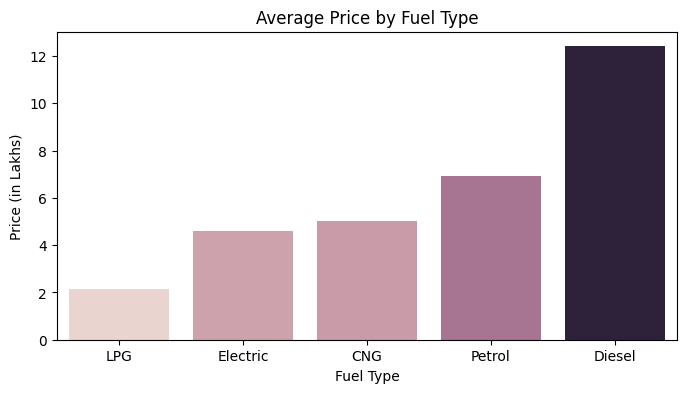

In [77]:
type = data_visu.groupby("Fuel Type")["price_num"].mean().sort_values(ascending = True)
plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Fuel Type')
plt.show()

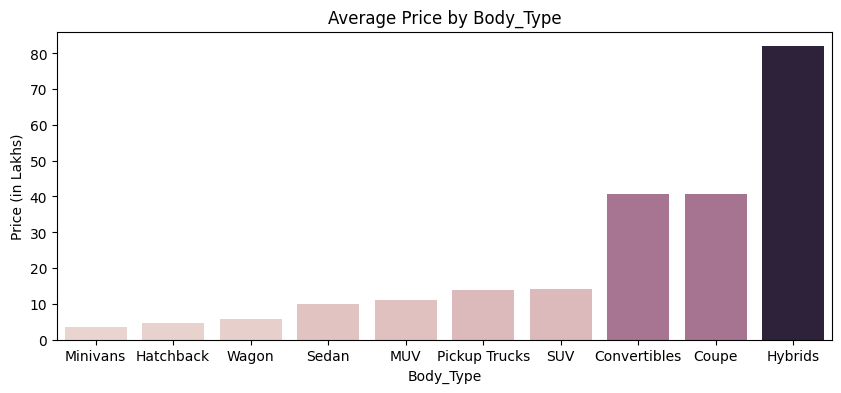

In [78]:
type = data_visu.groupby("Body_Type")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (10,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Body_Type')
plt.show()

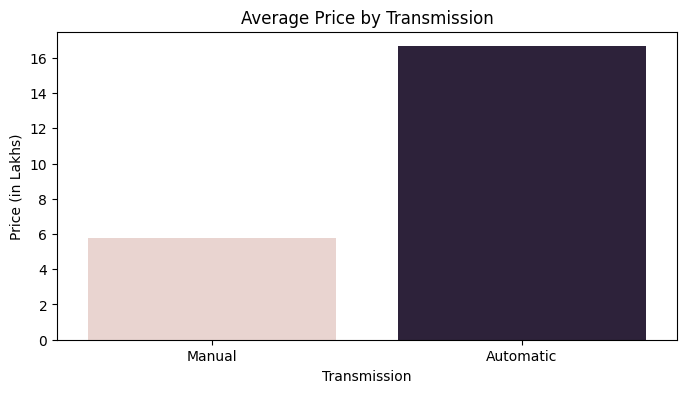

In [79]:
type = data_visu.groupby("Transmission")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Transmission')
plt.show()

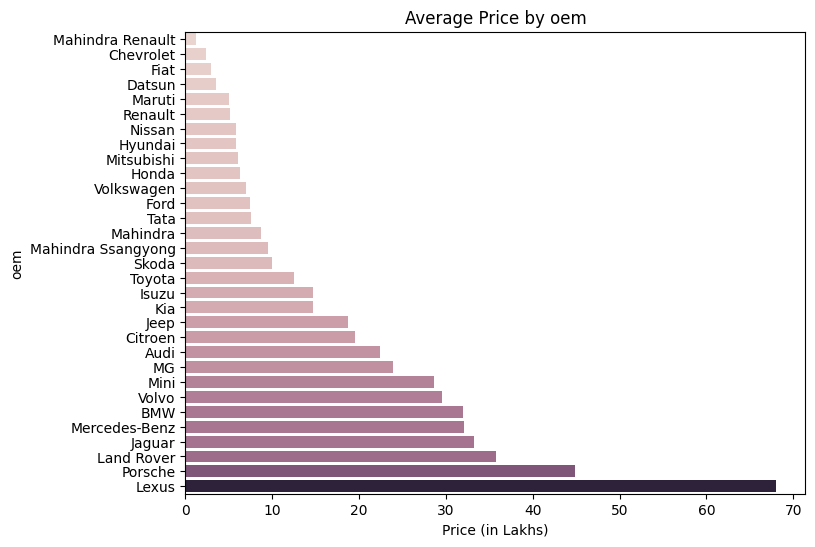

In [80]:
type = data_visu.groupby("oem")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,6))
sns.barplot(y = type.index, x = type, hue = type, legend = False, orient ="h")
plt.xlabel("Price (in Lakhs)")
plt.title('Average Price by oem')
plt.show()

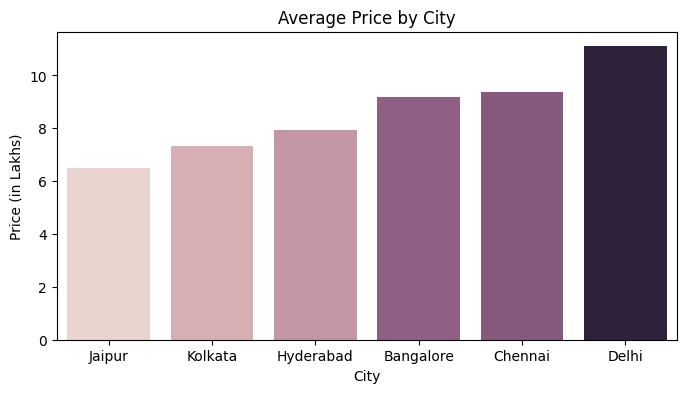

In [81]:
type = data_visu.groupby("City")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by City')
plt.show()

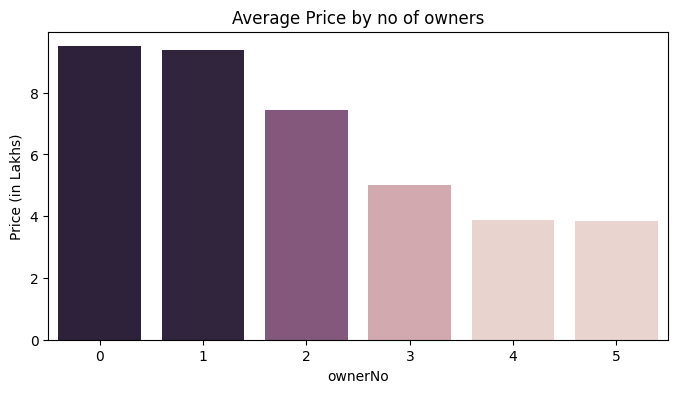

In [82]:
type = data_visu.groupby("ownerNo")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by no of owners')
plt.show()

# label encoding for categorical features

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in new_df.select_dtypes("O").columns:
    new_df[i+"_encode"] = le.fit_transform(new_df[i])
    

C:\Users\suffu\AppData\Local\Temp\ipykernel_10688\4011022905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i+"_encode"] = le.fit_transform(new_df[i])
C:\Users\suffu\AppData\Local\Temp\ipykernel_10688\4011022905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i+"_encode"] = le.fit_transform(new_df[i])
C:\Users\suffu\AppData\Local\Temp\ipykernel_10688\4011022905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [84]:
new_df

,City,Body_Type,Kilometers_driven,ownerNo,oem,model,modelYear,Displacement,variantName,Insurance Validity,...,Fuel Type_Petrol,Transmission_Manual,City_encode,Body_Type_encode,oem_encode,model_encode,variantName_encode,Insurance Validity_encode,Color_encode,Engine Type_encode
3,Bangalore,Sedan,17794,1,Hyundai,Hyundai Xcent,0.763158,1197,1.2 Kappa S Option,Comprehensive,...,True,True,0,5,6,49,28,1,60,130
4,Bangalore,SUV,60000,1,Maruti,Maruti SX4 S Cross,0.789474,1248,DDiS 200 Zeta,Third Party insurance,...,False,True,0,4,12,80,435,4,38,78
7,Bangalore,Sedan,37000,1,Maruti,Maruti Ciaz,0.868421,1462,Alpha Automatic BSIV,Comprehensive,...,True,False,0,5,12,71,377,1,44,209
9,Bangalore,Hatchback,50000,1,Maruti,Maruti Baleno,0.868421,1197,1.2 Delta,Third Party insurance,...,True,True,0,0,12,69,13,4,76,189
10,Bangalore,Hatchback,24887,1,Hyundai,Hyundai Grand i10,0.894737,1197,1.2 Kappa Sportz Option AT,Third Party insurance,...,True,False,0,0,6,43,34,4,58,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,Kolkata,Hatchback,38000,1,Hyundai,Hyundai i10,0.684211,1197,Sportz,Third Party insurance,...,True,True,5,0,6,50,711,4,40,85
7707,Kolkata,Sedan,60000,1,Maruti,Maruti Swift Dzire,0.657895,1298,VXi,Third Party insurance,...,True,True,5,5,12,82,822,4,60,102
7709,Kolkata,Sedan,60000,1,Honda,Honda City,0.736842,1497,V MT,Third Party insurance,...,True,True,5,5,5,32,756,4,60,149
7714,Kolkata,Hatchback,40000,1,Maruti,Maruti Ritz,0.710526,1197,ZXi,Third Party insurance,...,True,True,5,0,12,78,913,4,60,108


In [85]:
new_df.columns

Index(['City', 'Body_Type', 'Kilometers_driven', 'ownerNo', 'oem', 'model',
       'modelYear', 'Displacement', 'variantName', 'Insurance Validity',
       'No of Cylinder', 'Color', 'Values per Cylinder', 'Engine Type',
       'Seats', 'Mileage_num', 'Torque_num', 'price_num', 'Power_num',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_LPG',
       'Fuel Type_Petrol', 'Transmission_Manual', 'City_encode',
       'Body_Type_encode', 'oem_encode', 'model_encode', 'variantName_encode',
       'Insurance Validity_encode', 'Color_encode', 'Engine Type_encode'],
      dtype='object')

<Axes: xlabel='price_num', ylabel='Count'>

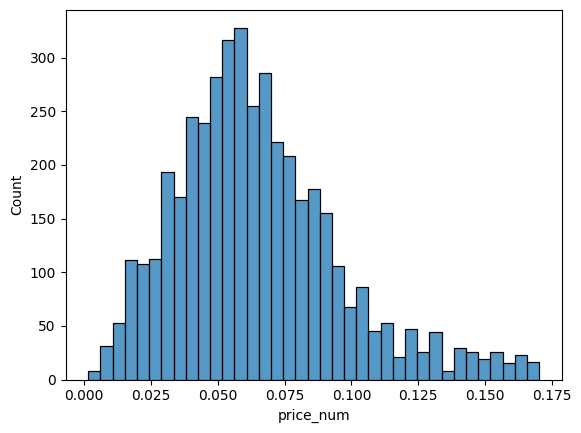

In [86]:
sns.histplot(new_df["price_num"])

C:\Users\suffu\AppData\Local\Temp\ipykernel_10688\684305971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["price_num"] = new_df["price_num"].apply(lambda x: np.log(x))


<Axes: xlabel='price_num', ylabel='Count'>

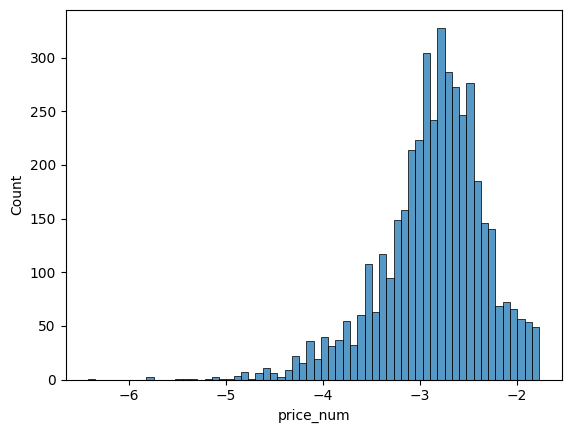

In [87]:
# after applying log transformation
new_df["price_num"] = new_df["price_num"].apply(lambda x: np.log(x))
sns.histplot(new_df["price_num"])

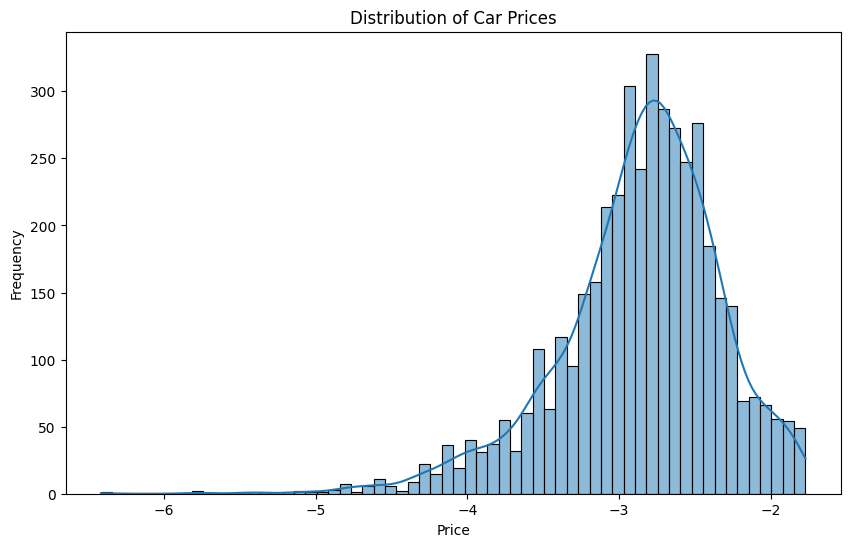

In [88]:
# Distribution Plot for Price
plt.figure(figsize=(10, 6))
sns.histplot(new_df['price_num'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

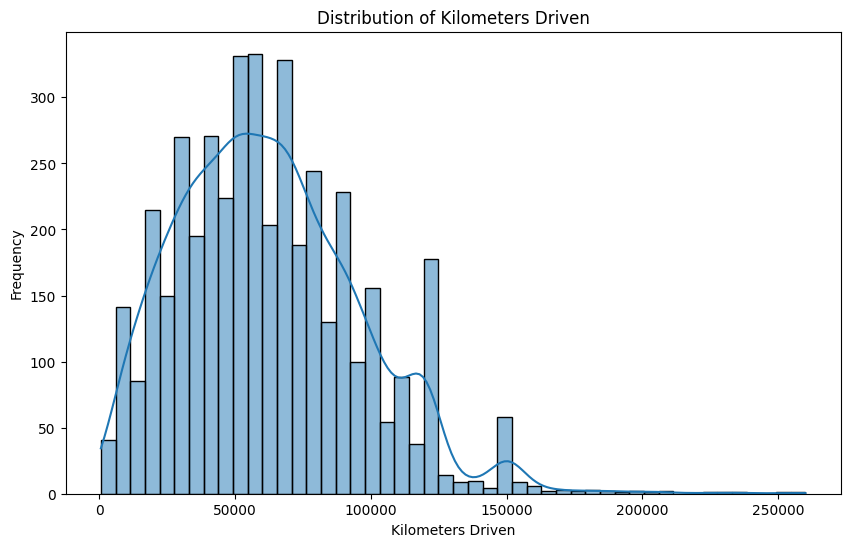

In [89]:
# Distribution Plot for Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Kilometers_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

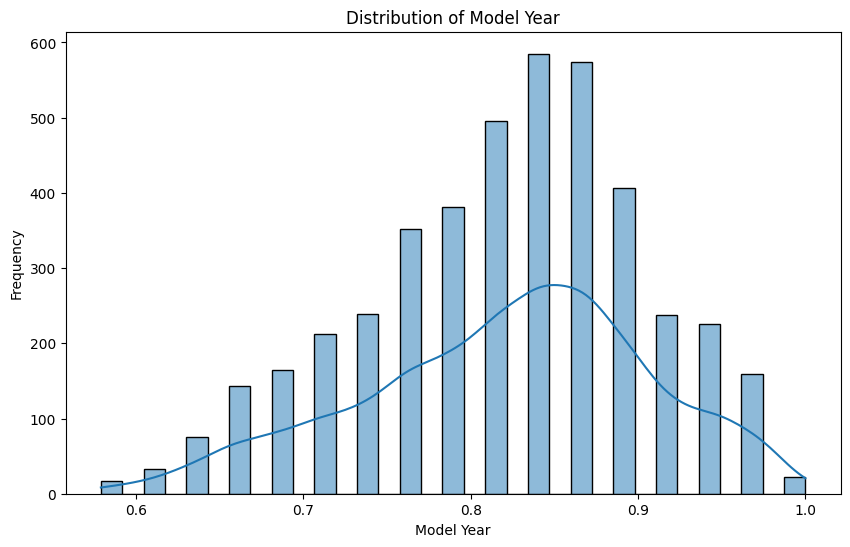

In [90]:
# Distribution Plot for Model Year
plt.figure(figsize=(10, 6))
sns.histplot(new_df['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

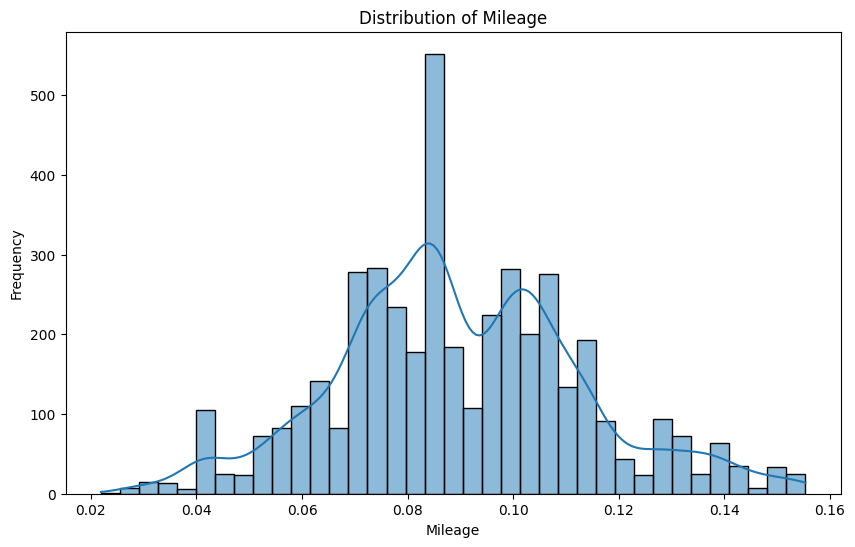

In [91]:
# Distribution Plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Mileage_num'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

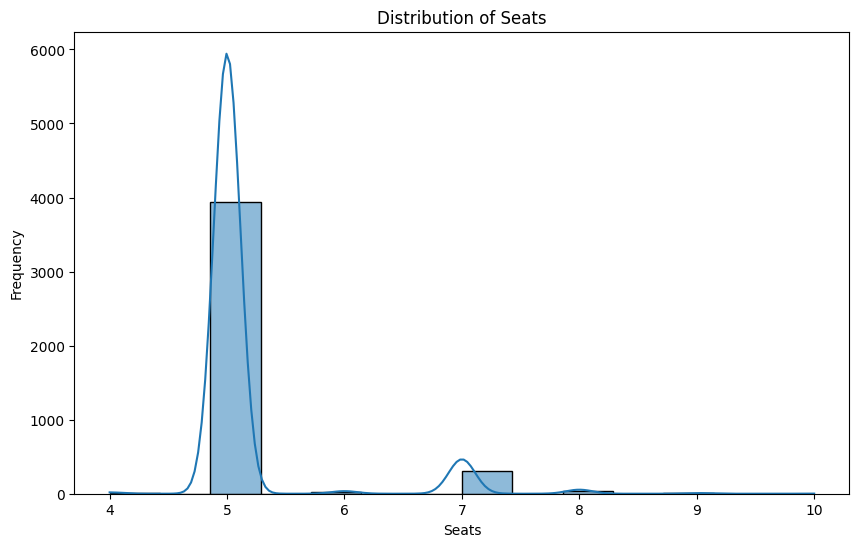

In [92]:
# Distribution Plot for Seats
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

In [93]:
# Select only numeric columns
df_numeric = new_df.select_dtypes(include=[np.number])

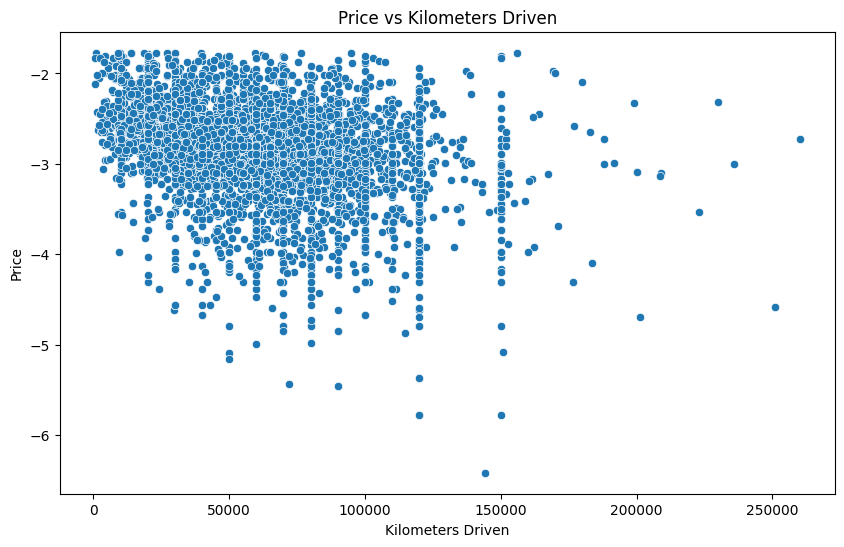

In [94]:

# Scatter Plot of Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_driven', y='price_num', data=new_df)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

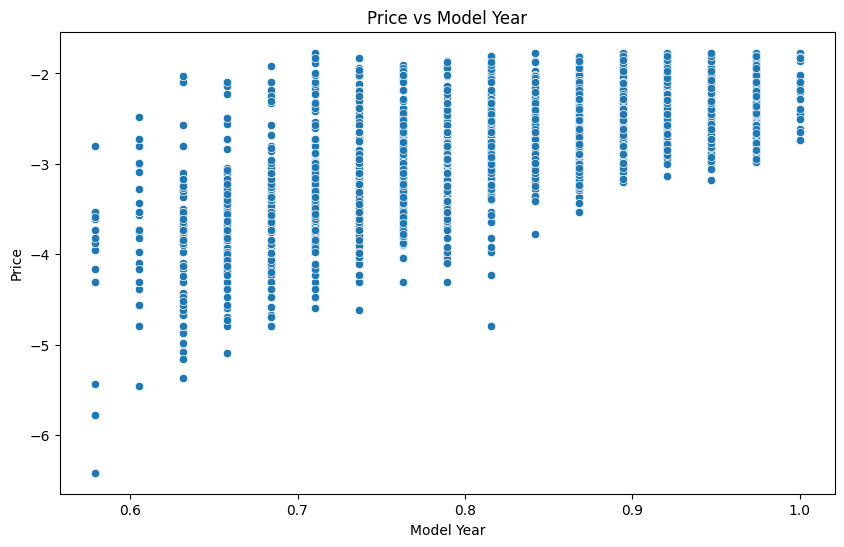

In [95]:
# Scatter Plot of Price vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price_num', data=new_df)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

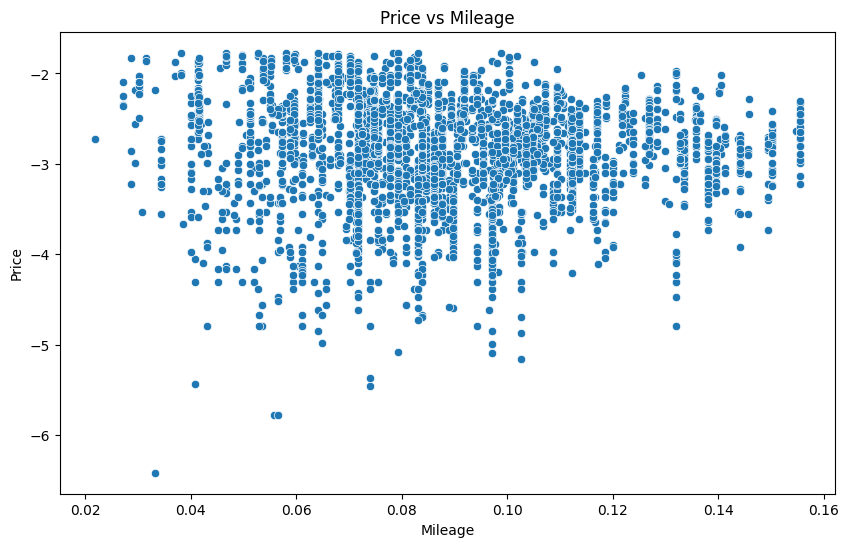

In [96]:
# Scatter Plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_num', y='price_num', data=new_df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

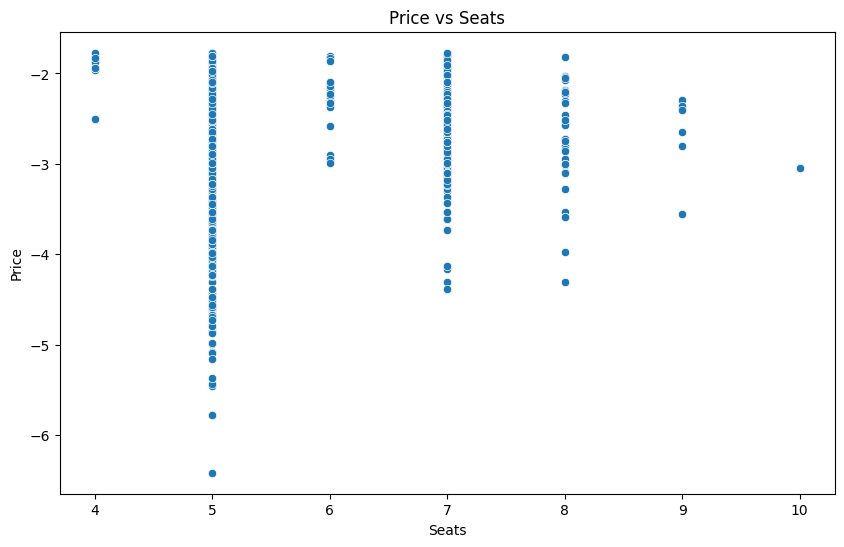

In [97]:
# Scatter Plot of Price vs Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='price_num', data=new_df)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

In [98]:
cor = new_df.corr(numeric_only = True)
cor

,Kilometers_driven,ownerNo,modelYear,Displacement,No of Cylinder,Values per Cylinder,Seats,Mileage_num,Torque_num,price_num,...,Fuel Type_Petrol,Transmission_Manual,City_encode,Body_Type_encode,oem_encode,model_encode,variantName_encode,Insurance Validity_encode,Color_encode,Engine Type_encode
Kilometers_driven,1.000000,0.216558,-0.511264,0.269509,NaN,NaN,0.183304,0.026582,0.241782,-0.306316,...,-0.409638,0.133059,-0.016222,0.085838,0.140364,0.145770,-0.049514,0.094685,0.051212,0.007329
ownerNo,0.216558,1.000000,-0.321573,0.105962,NaN,NaN,0.060462,-0.113866,0.022876,-0.259045,...,-0.055768,0.010952,-0.059868,-0.025476,0.009885,0.017317,-0.043433,0.096970,0.041368,-0.010119
modelYear,-0.511264,-0.321573,1.000000,-0.184178,NaN,NaN,-0.107062,0.183682,0.016982,0.722652,...,0.145199,-0.156774,0.004694,0.025722,-0.004263,-0.029994,0.048822,-0.053150,-0.041720,0.005396
Displacement,0.269509,0.105962,-0.184178,1.000000,NaN,NaN,0.579445,-0.486802,0.603892,0.273388,...,-0.410433,-0.038069,0.036625,0.413382,0.224429,0.190647,0.012051,0.064843,-0.012712,0.103868
No of Cylinder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Values per Cylinder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,0.183304,0.060462,-0.107062,0.579445,NaN,NaN,1.000000,-0.301752,0.338362,0.146667,...,-0.307384,0.098263,0.048451,-0.011596,0.213930,0.181067,0.098432,0.054032,-0.009246,0.018746
Mileage_num,0.026582,-0.113866,0.183682,-0.486802,NaN,NaN,-0.301752,1.000000,0.010900,-0.059004,...,-0.350287,0.139065,0.003403,-0.189718,0.041188,0.046497,0.082522,-0.001929,-0.002731,-0.143676
Torque_num,0.241782,0.022876,0.016982,0.603892,NaN,NaN,0.338362,0.010900,1.000000,0.354862,...,-0.720446,-0.025119,0.054309,0.396228,0.223134,0.187889,0.027375,0.058085,-0.000988,0.034369
price_num,-0.306316,-0.259045,0.722652,0.273388,NaN,NaN,0.146667,-0.059004,0.354862,1.000000,...,-0.080651,-0.278111,-0.158583,0.249872,0.062008,0.034915,0.034338,-0.063362,-0.020199,0.081275


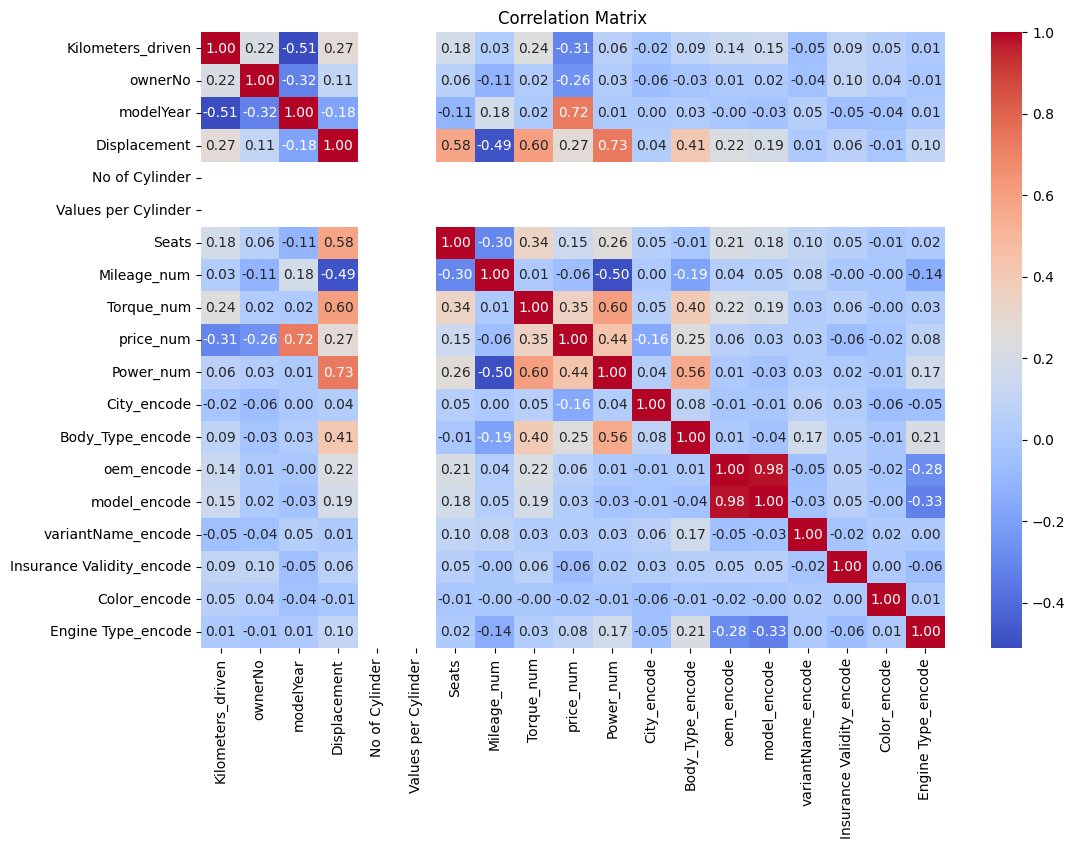

In [99]:
# Correlation Matrix for the scaled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [100]:
new_df.to_csv("C:\\Guvi Projects\\Car Dekho\\Dataset\\CleanedCSV\\Cleaned_car_dataset.csv", index = False, encoding = "utf-8-sig")

# Model Development

In [108]:
import pandas as pd

df = pd.read_csv("C:\\Guvi Projects\\Car Dekho\\Dataset\\CleanedCSV\\Cleaned_car_dataset.csv")
df

,City,Body_Type,Kilometers_driven,ownerNo,oem,model,modelYear,Displacement,variantName,Insurance Validity,...,Fuel Type_Petrol,Transmission_Manual,City_encode,Body_Type_encode,oem_encode,model_encode,variantName_encode,Insurance Validity_encode,Color_encode,Engine Type_encode
0,Bangalore,Sedan,17794,1,Hyundai,Hyundai Xcent,0.763158,1197,1.2 Kappa S Option,Comprehensive,...,True,True,0,5,6,49,28,1,60,130
1,Bangalore,SUV,60000,1,Maruti,Maruti SX4 S Cross,0.789474,1248,DDiS 200 Zeta,Third Party insurance,...,False,True,0,4,12,80,435,4,38,78
2,Bangalore,Sedan,37000,1,Maruti,Maruti Ciaz,0.868421,1462,Alpha Automatic BSIV,Comprehensive,...,True,False,0,5,12,71,377,1,44,209
3,Bangalore,Hatchback,50000,1,Maruti,Maruti Baleno,0.868421,1197,1.2 Delta,Third Party insurance,...,True,True,0,0,12,69,13,4,76,189
4,Bangalore,Hatchback,24887,1,Hyundai,Hyundai Grand i10,0.894737,1197,1.2 Kappa Sportz Option AT,Third Party insurance,...,True,False,0,0,6,43,34,4,58,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,Kolkata,Hatchback,38000,1,Hyundai,Hyundai i10,0.684211,1197,Sportz,Third Party insurance,...,True,True,5,0,6,50,711,4,40,85
4320,Kolkata,Sedan,60000,1,Maruti,Maruti Swift Dzire,0.657895,1298,VXi,Third Party insurance,...,True,True,5,5,12,82,822,4,60,102
4321,Kolkata,Sedan,60000,1,Honda,Honda City,0.736842,1497,V MT,Third Party insurance,...,True,True,5,5,5,32,756,4,60,149
4322,Kolkata,Hatchback,40000,1,Maruti,Maruti Ritz,0.710526,1197,ZXi,Third Party insurance,...,True,True,5,0,12,78,913,4,60,108


In [109]:
df.columns

Index(['City', 'Body_Type', 'Kilometers_driven', 'ownerNo', 'oem', 'model',
       'modelYear', 'Displacement', 'variantName', 'Insurance Validity',
       'No of Cylinder', 'Color', 'Values per Cylinder', 'Engine Type',
       'Seats', 'Mileage_num', 'Torque_num', 'price_num', 'Power_num',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_LPG',
       'Fuel Type_Petrol', 'Transmission_Manual', 'City_encode',
       'Body_Type_encode', 'oem_encode', 'model_encode', 'variantName_encode',
       'Insurance Validity_encode', 'Color_encode', 'Engine Type_encode'],
      dtype='object')

In [110]:
inf_counts = df.isin([float('inf'), float('-inf')]).sum().sum()
print("Infinite Count in the entire DataFrame:", inf_counts)

Infinite Count in the entire DataFrame: 0


# Train Test Split

In [111]:
X = df[[ 'Kilometers_driven', 'ownerNo' ,
    'modelYear', 'Displacement', 'No of Cylinder',
    'Values per Cylinder',  'Seats', 'Mileage_num',
    'Torque_num', 'Power_num', 'City_encode', 'Body_Type_encode', 'oem_encode',
    'model_encode', 'Insurance Validity_encode', 'Color_encode',
    'Engine Type_encode']]

y = df['price_num']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the train and test datasets
print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 3459
X_test length: 865
y_train length: 3459
y_test length: 865


# Linear Regression

Linear Regression CV Mean MSE: 0.0658852927044385
Linear Regression - MSE: 0.06396335835306835, MAE: 0.18256681283811657, R²: 0.7791896108347384


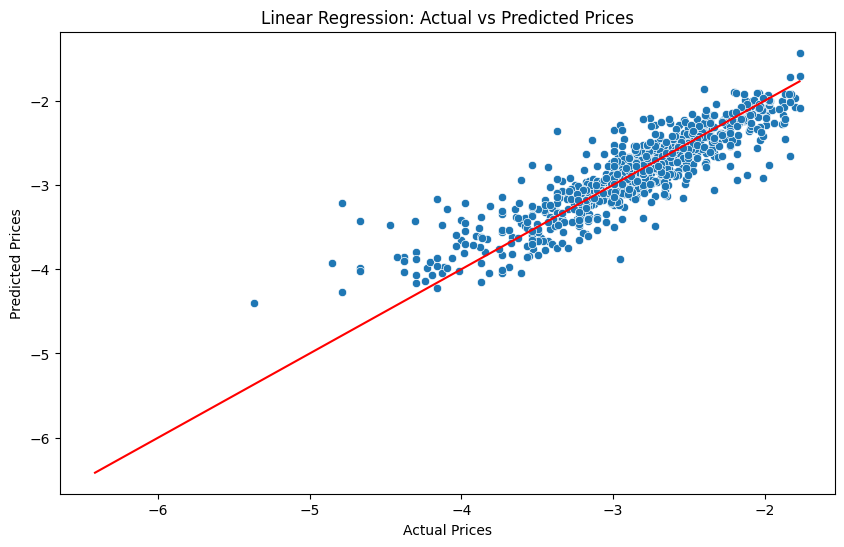

Best Ridge Alpha: {'alpha': 0.1}
Best Lasso Alpha: {'alpha': 0.01}


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

# GradientBoostingRegressor

Gradient Boosting CV Mean MSE: 0.040343305703870194
Gradient Boosting - MSE: 0.03299944331343367, MAE: 0.13373800928822338, R²: 0.8860813423826934


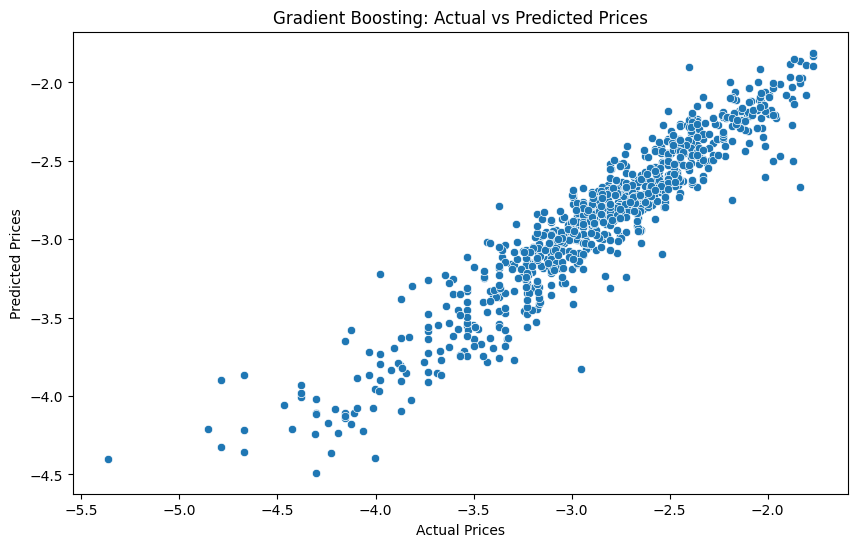

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05}


In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

# DecisionTreeRegressor

Decision Tree CV Mean MSE: 0.07723088173375593
Decision Tree - MSE: 0.0734532158240189, MAE: 0.2005676300258035, R²: 0.7464293059471052


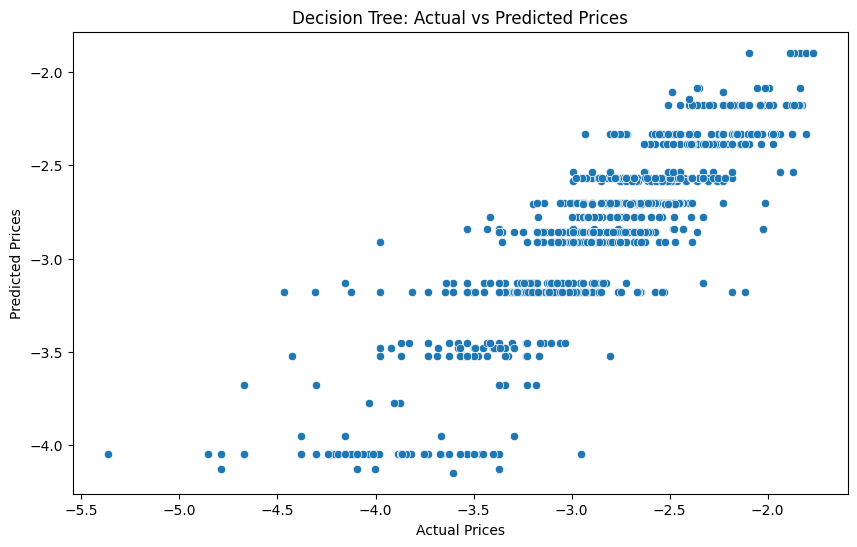

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

# RandomForestRegressor

Random Forest CV Mean MSE: 0.04204798097569855
Random Forest - MSE: 0.03363188587131183, MAE: 0.12883572571982693, R²: 0.8838980629094847


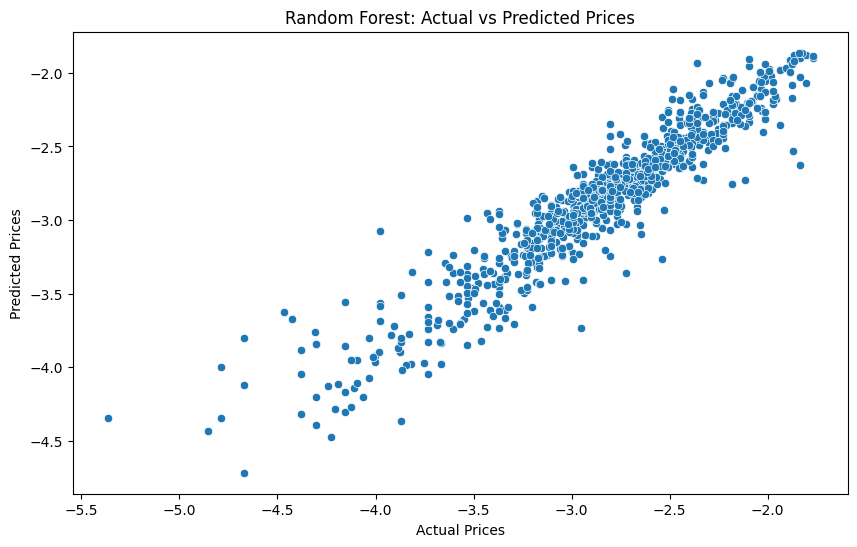

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

# KNeighborsRegressor

KNN - MSE: 0.22417963998170265, MAE: 0.3618039362290733, R²: 0.22610077360152525


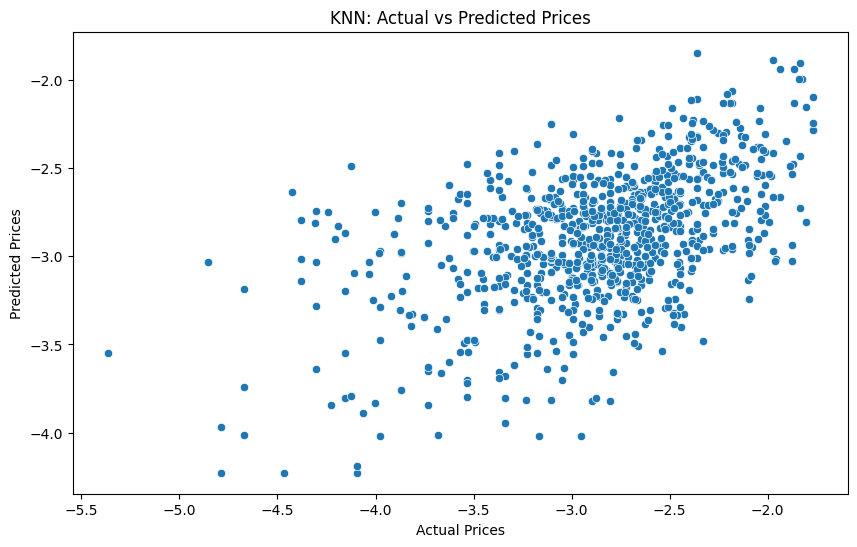

Best KNN Params: {'weights': 'distance', 'n_neighbors': 9, 'leaf_size': 50, 'algorithm': 'auto'}


In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
model_kn = KNeighborsRegressor(n_neighbors=4)
model_kn.fit(X_train, y_train)

# Model Prediction
y_pred_kn = model_kn.predict(X_test)

# Model Evaluation
mse_kn = mean_squared_error(y_test, y_pred_kn)
mae_kn = mean_absolute_error(y_test, y_pred_kn)
r2_kn = r2_score(y_test, y_pred_kn)

print(f'KNN - MSE: {mse_kn}, MAE: {mae_kn}, R²: {r2_kn}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_kn)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('KNN: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
knn_params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

knn_random = RandomizedSearchCV(KNeighborsRegressor(), knn_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
knn_random.fit(X_train, y_train)

print(f'Best KNN Params: {knn_random.best_params_}')

# Model Comparison

In [118]:
import pandas as pd

# Store model evaluation metrics, including KNN
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest', 'KNN'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf, mse_kn],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf, mae_kn],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf, r2_kn]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model       MSE       MAE        R²
0  Linear Regression  0.063963  0.182567  0.779190
1  Gradient Boosting  0.032999  0.133738  0.886081
2      Decision Tree  0.073453  0.200568  0.746429
3      Random Forest  0.033632  0.128836  0.883898
4                KNN  0.224180  0.361804  0.226101

Best Model Summary:
Best Model: Gradient Boosting
MSE: 0.03299944331343367
MAE: 0.13373800928822338
R²: 0.8860813423826934


# RandomForestRegressor

Index(['City', 'Fuel Type', 'Body_Type', 'Kilometers_driven', 'Transmission',
       'ownerNo', 'oem', 'model', 'modelYear', 'Displacement', 'variantName',
       'Insurance Validity', 'No of Cylinder', 'Color', 'Values per Cylinder',
       'Engine Type', 'Seats', 'Mileage_num', 'Torque_num', 'price_num',
       'Power_num', 'car_age', 'brand_popularity', 'mileage_normalized'],
      dtype='object')
Random Forest CV Mean MSE: 16.89576708690675
Random Forest - MSE: 17.757787158847382, MAE: 1.6894541079115002, R²: 0.835007005285038
Training Time: 439.3362729549408 seconds
Prediction Time: 0.06589078903198242 seconds
Older Cars - MSE: 1.541875807909552, MAE: 0.6116276561181229, R²: 0.8969541516790202


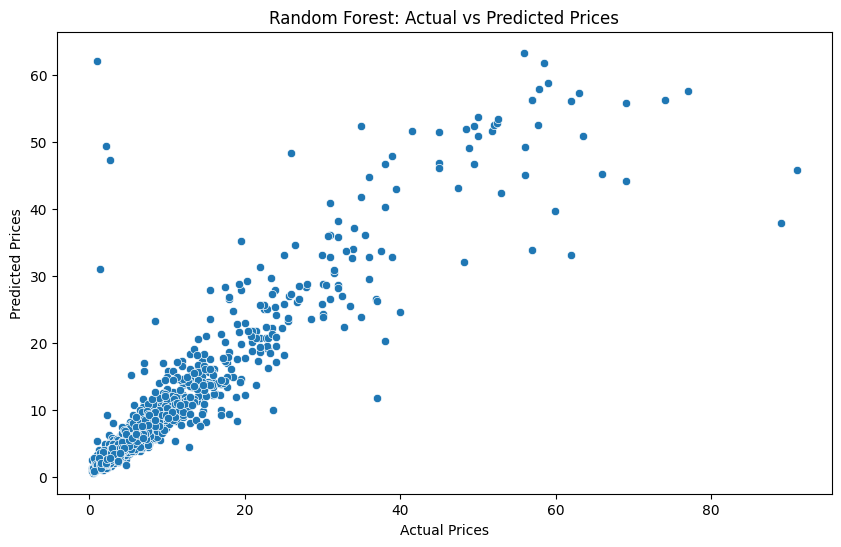

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [119]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv("C:/Guvi Projects/Car Dekho/Dataset/CleanedCSV/car_dekho_cleaned_dataset.csv")


# Load preprocessing steps
#label_encoders = joblib.load("C:\\Guvi Projects\\Car Dekho\Dataset\\label_encoders.pkl")
#scalers = joblib.load("C:\\Guvi Projects\\Car Dekho\\Dataset\\scalers.pkl")

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price_num'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['Mileage_num'] / data['car_age']


# Inspect the columns to identify categorical variables
print(data.columns)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Fuel Type','City','Body_Type', 'Transmission','oem','model','variantName'], drop_first=True)

# Define features and target variable
features = ['Kilometers_driven', 'ownerNo', 'modelYear', 
            'Mileage_num', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price_num']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price_num']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_rf_model, 'C:\\Guvi Projects\\Car Dekho\\Dataset\\car_price_prediction_model_randomforest.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")

# GradientBoostingRegressor

Index(['City', 'Fuel Type', 'Body_Type', 'Kilometers_driven', 'Transmission',
       'ownerNo', 'oem', 'model', 'modelYear', 'Displacement', 'variantName',
       'Insurance Validity', 'No of Cylinder', 'Color', 'Values per Cylinder',
       'Engine Type', 'Seats', 'Mileage_num', 'Torque_num', 'price_num',
       'Power_num', 'car_age', 'brand_popularity', 'mileage_normalized'],
      dtype='object')
Gradient Boosting CV Mean MSE: 15.024360580727347
Gradient Boosting - MSE: 18.605490053771955, MAE: 1.6577709993621337, R²: 0.8271307401844923
Training Time: 208.7389371395111 seconds
Prediction Time: 0.022997140884399414 seconds
Older Cars - MSE: 1.6004933922990308, MAE: 0.7178541251885584, R²: 0.8930366515282592


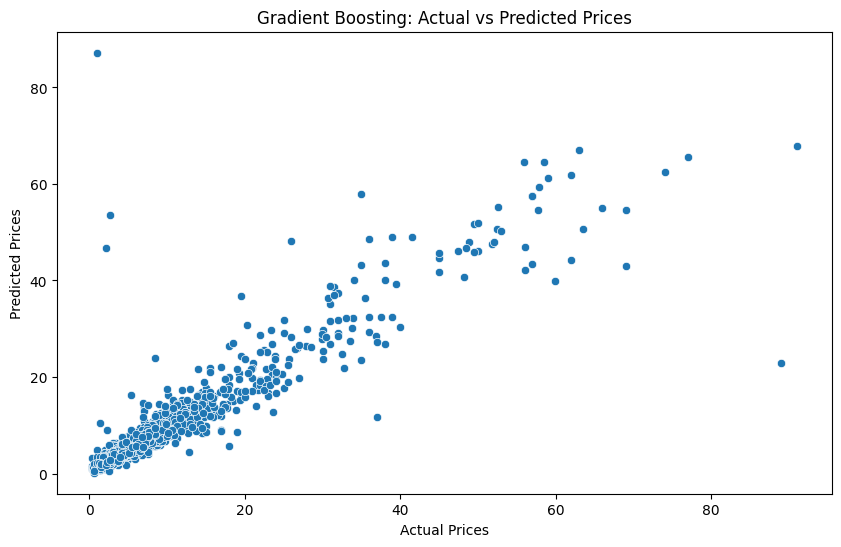

Model training complete. Model saved as 'car_price_prediction_model_gradientboosting.pkl'.


In [120]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv("C:/Guvi Projects/Car Dekho/Dataset/CleanedCSV/car_dekho_cleaned_dataset.csv")

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price_num'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['Mileage_num'] / data['car_age']

# Inspect the columns to identify categorical variables
print(data.columns)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Fuel Type','City','Body_Type', 'Transmission','oem','model','variantName'], drop_first=True)

# Define features and target variable
features = ['Kilometers_driven', 'ownerNo', 'modelYear', 
            'Mileage_num', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

start_time = time.time()
gb_random = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gb_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_gb_model = gb_random.best_estimator_

# Cross-Validation
gb_cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gb_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_gb = best_gb_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, R²: {r2_gb}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price_num']

y_pred_older = best_gb_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_gb_model, 'C:\\Guvi Projects\\Car Dekho\\Dataset\\car_price_prediction_model_gradientboosting.pkl')

print("Model training complete. Model saved as 'car_price_prediction_model_gradientboosting.pkl'.")